             area   perimeter  compactness      length       width  \
count  210.000000  210.000000   210.000000  210.000000  210.000000   
mean    14.847524   14.559286     0.870999    5.628533    3.258605   
std      2.909699    1.305959     0.023629    0.443063    0.377714   
min     10.590000   12.410000     0.808100    4.899000    2.630000   
25%     12.270000   13.450000     0.856900    5.262250    2.944000   
50%     14.355000   14.320000     0.873450    5.523500    3.237000   
75%     17.305000   15.715000     0.887775    5.979750    3.561750   
max     21.180000   17.250000     0.918300    6.675000    4.033000   

        asymmetry  groove_length     variety  
count  210.000000     210.000000  210.000000  
mean     3.700201       5.408071    2.000000  
std      1.503557       0.491480    0.818448  
min      0.765100       4.519000    1.000000  
25%      2.561500       5.045000    1.000000  
50%      3.599000       5.223000    2.000000  
75%      4.768750       5.877000    3.00

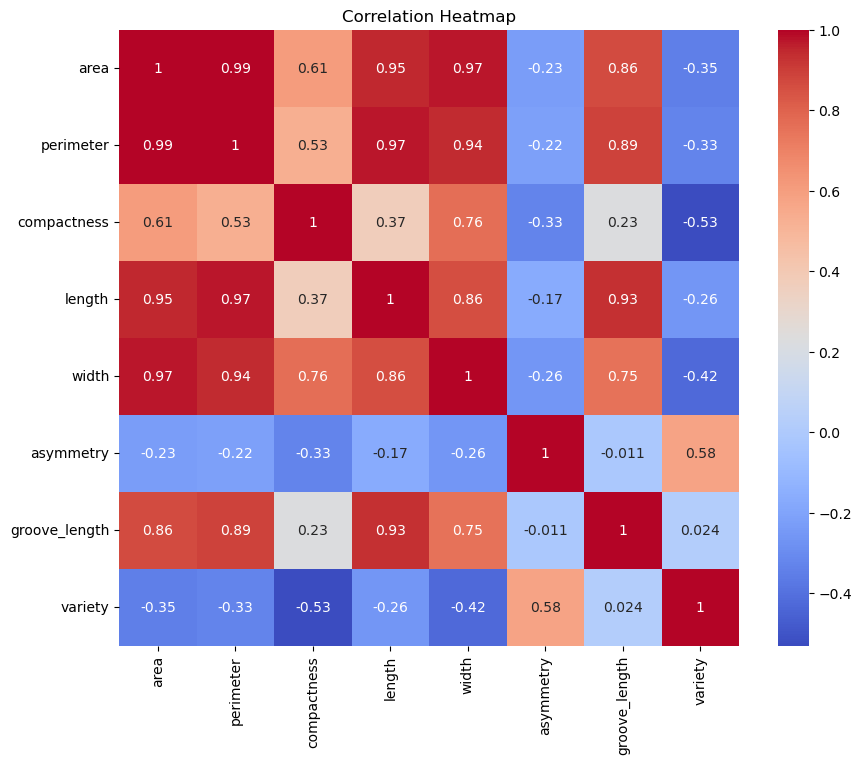

In [35]:
#1a initial exploration
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import v_measure_score

#generate descriptions
df = pd.read_csv('seeds_dataset.txt', sep='\t')
print(df.describe())

corr_matrix = df.corr()

# makes and plots heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

X = df[['area', 'perimeter', 'compactness']].copy()
df_ground_truth = df['variety']



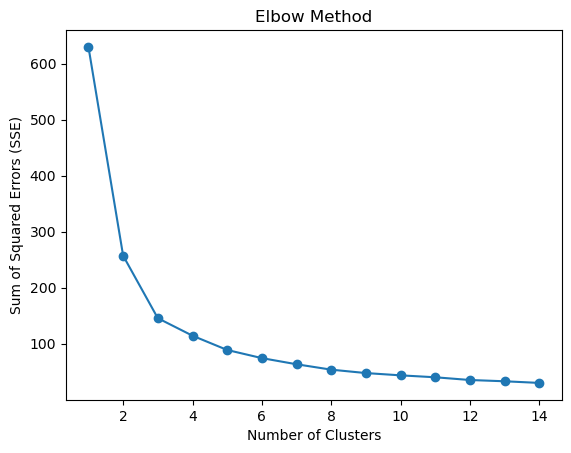

In [36]:
#1b. k-means cluster
sse = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# plot SSE to find the elbow
plt.figure()
plt.plot(range(1, 15), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method')
plt.show()


In [37]:
#1c. v-measure score
from sklearn.metrics import v_measure_score

# apply kmeans with optimal # of clusters
optimal_k = 3  # according to elbow
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# calculate v-measure
v_measure = v_measure_score(df['variety'], df['cluster'])
print(f'V-measure: {v_measure}')


V-measure: 0.6051312828303149


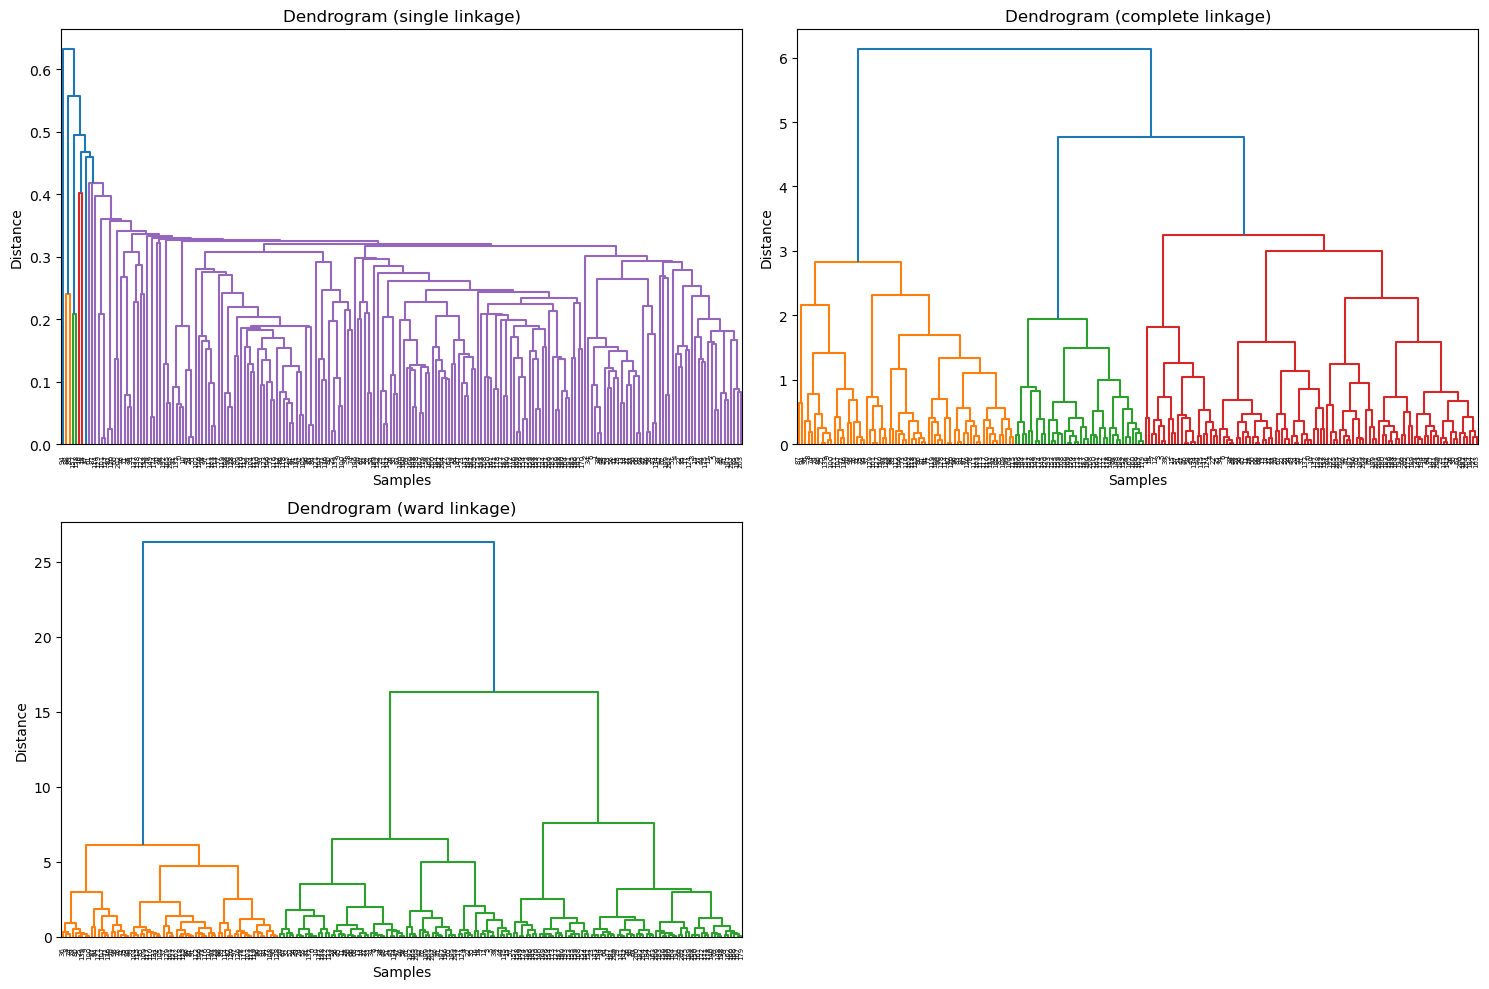

In [38]:
#2a. agglomerative clustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
from sklearn.metrics import v_measure_score

# use standardized data
X = df[['area', 'perimeter', 'compactness']].copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# linkage methods
linkage_methods = ['single', 'complete', 'ward']

# agglomerative clustering and generate dendrograms for each linkage
plt.figure(figsize=(15, 10))

for i, method in enumerate(linkage_methods):
    plt.subplot(2, 2, i+1)
    Z = linkage(X_scaled, method=method)
    dendrogram(Z)
    plt.title(f'Dendrogram ({method} linkage)')
    plt.xlabel('Samples')
    plt.ylabel('Distance')

plt.tight_layout()
plt.show()


In [34]:
#2b v-measure for clusterings
cutoffs = [5, 10, 15, 20]  # different distance cutoffs
v_measure_scores = {}

#produce each v-measure
for method in linkage_methods:
    Z = linkage(X_scaled, method=method)
    print(f"\nLinkage method: {method}")
    for cutoff in cutoffs:
        clusters = fcluster(Z, cutoff, criterion='distance')
        v_measure = v_measure_score(df['variety'], clusters)
        print(f"Cutoff: {cutoff}, V-measure: {v_measure}")


Linkage method: single
Cutoff: 5, V-measure: 0.0
Cutoff: 10, V-measure: 0.0
Cutoff: 15, V-measure: 0.0
Cutoff: 20, V-measure: 0.0

Linkage method: complete
Cutoff: 5, V-measure: 0.48924512700410333
Cutoff: 10, V-measure: 0.0
Cutoff: 15, V-measure: 0.0
Cutoff: 20, V-measure: 0.0

Linkage method: ward
Cutoff: 5, V-measure: 0.4892898852109031
Cutoff: 10, V-measure: 0.5612524212262202
Cutoff: 15, V-measure: 0.5612524212262202
Cutoff: 20, V-measure: 0.48924512700410333
